In [1]:
import os
import numpy as np
from DataLoader3 import load_images_from_selected_classes

# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load and resize images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Convert the loaded images per class into an array list
images_array_dict = {}
for class_name, images in loaded_images_dict.items():
    images_array_dict[class_name] = np.array(images)


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Concatenate all images and labels into arrays
X = []
y = []
for class_name, images_array in images_array_dict.items():
    X.extend(images_array)
    y.extend([class_name] * len(images_array))
    
X = np.array(X)
y = np.array(y)


# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert class labels to one-hot encoding
y_onehot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Load pre-trained ResNet50 model without top layers (include_top=False)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for classification
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(len(np.unique(y))),  # Output layer with number of classes
    Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=8, validation_split=0.2) #reduced batch size because kernel was dying

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/5



32/32 [==============================] - 69s 2s/step - loss: 0.7508 - accuracy: 0.8047 - val_loss: 7206433.5000 - val_accuracy: 0.2031
Epoch 2/5
32/32 [==============================] - 51s 2s/step - loss: 0.9420 - accuracy: 0.7383 - val_loss: 4811.6182 - val_accuracy: 0.2031
Epoch 3/5
32/32 [==============================] - 56s 2s/step - loss: 0.3910 - accuracy: 0.8984 - val_loss: 45.0127 - val_accuracy: 0.1094
Epoch 4/5
32/32 [==============================] - 64s 2s/step - loss: 0.2759 - accuracy: 0.9102 - val_loss: 106.2588 - val_accuracy: 0.0781
Epoch 5/5
3/3 [==============================] - 5s 1s/step - loss: 5.4565 - accuracy: 0.7625
Test Loss: 5.456451416015625, Test Accuracy: 0.762499988079071


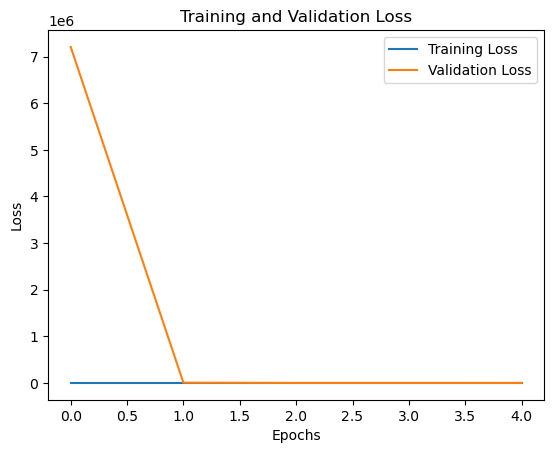

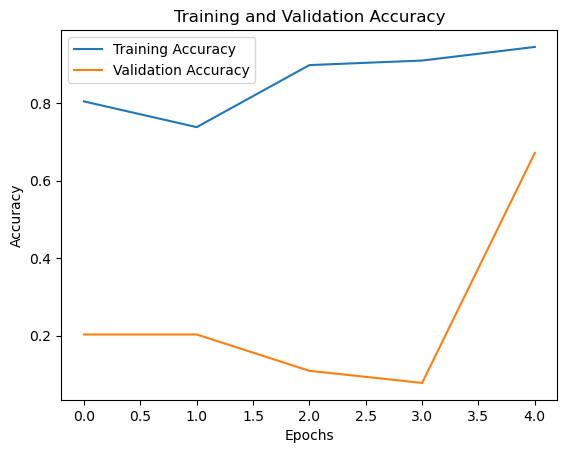

In [3]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
